In [12]:
# importing libraries for web scraping

import requests
import bs4

In [13]:
# requesting to approach website dimenzija

req = requests.get('https://en.wikipedia.org/wiki/Nikola_Tesla')

In [14]:
# check type of req

type(req)

requests.models.Response

In [15]:
# making special object soup with beautiful soup, we convert our req in text form and decoding it with lmxl

soup= bs4.BeautifulSoup(req.text,'lxml')

In [16]:
# lets see how our html soup look like

soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Nikola Tesla - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YAIREQpAADsAAJ4rJDcAAADW","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Nikola_Tesla","wgTitle":"Nikola Tesla","wgCurRevisionId":1000604551,"wgRevisionId":1000604551,"wgArticleId":21473,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Harv and Sfn no-target errors","Harv and Sfn multiple-target errors","All articles lacking reliable references","Articles lacking reliable references from March 2016","Subscription req

In [17]:
# Lets see all the headlines in this wikipedia article
# After inspecting site we found-out that all headlines are in class .mw-headline so with func select we 

soup.select('.mw-headline')

[<span class="mw-headline" id="Early_years">Early years</span>,
 <span class="mw-headline" id="Working_at_Budapest_Telephone_Exchange">Working at Budapest Telephone Exchange</span>,
 <span class="mw-headline" id="Working_at_Edison">Working at Edison</span>,
 <span class="mw-headline" id="Move_to_the_United_States">Move to the United States</span>,
 <span class="mw-headline" id="Tesla_Electric_Light_&amp;_Manufacturing">Tesla Electric Light &amp; Manufacturing</span>,
 <span class="mw-headline" id="AC_and_the_induction_motor">AC and the induction motor</span>,
 <span class="mw-headline" id="Market_turmoil">Market turmoil</span>,
 <span class="mw-headline" id="New_York_laboratories">New York laboratories</span>,
 <span class="mw-headline" id="Tesla_coil">Tesla coil</span>,
 <span class="mw-headline" id="Citizenship">Citizenship</span>,
 <span class="mw-headline" id="Wireless_lighting">Wireless lighting</span>,
 <span class="mw-headline" id="Polyphase_system_and_the_Columbian_Exposition">

In [25]:
h=[]
for he in soup.select('.mw-headline'):
    h.append(he.text)
print(h)

['Early years', 'Working at Budapest Telephone Exchange', 'Working at Edison', 'Move to the United States', 'Tesla Electric Light & Manufacturing', 'AC and the induction motor', 'Market turmoil', 'New York laboratories', 'Tesla coil', 'Citizenship', 'Wireless lighting', 'Polyphase system and the Columbian Exposition', 'Steam-powered oscillating generator', 'Consulting on Niagara', 'The Nikola Tesla Company', 'Lab fire', 'X-ray experimentation', 'Radio remote control', 'Wireless power', 'Colorado Springs', 'Wardenclyffe', 'Later years', 'Bladeless turbine', 'Wireless lawsuits', 'Nobel Prize rumors', 'Other ideas, awards, and patents', 'Living circumstances', 'Birthday press conferences', 'Death', 'Estate', 'Patents', 'Personal', 'Appearance', 'Eidetic memory', 'Relationships', 'Sleep habits', 'Work habits', 'Views and beliefs', 'On experimental and theoretical physics', 'On society', 'On religion', 'Literary works', 'Legacy and honors', 'Things named after Tesla', 'Awards', 'Enterprises

In [37]:
# We wish to extract text part from section Early life
# First we select all the paragrafs with soup.select('p')

soup.select('p')

"Nikola Tesla was born an ethnic Serb in the village of Smiljan, within the Military Frontier, in the Austrian Empire (present day Croatia), on 10 July [O.S. 28 June] 1856.[14][15] His father, Milutin Tesla (1819–1879),[16] was an Eastern Orthodox priest.[17][18][19][20] Tesla's mother, Đuka Mandić (1822–1892), whose father was also an Orthodox priest,[21] had a talent for making home craft tools and mechanical appliances and the ability to memorize Serbian epic poems. Đuka had never received a formal education. Tesla credited his eidetic memory and creative abilities to his mother's genetics and influence.[22][23] Tesla's progenitors were from western Serbia, near Montenegro.[24]\n"

In [ ]:
# we was able to count paragrafs, and concluded that wanted text begin with p=&
# getting just text from paragraf number 6

soup.select('p')[6].text

In [33]:
# The last parag is number 16
soup.select('p')[16].text

"In January 1880, two of Tesla's uncles put together enough money to help him leave Gospić for Prague, where he was to study. He arrived too late to enroll at Charles-Ferdinand University; he had never studied Greek, a required subject; and he was illiterate in Czech, another required subject. Tesla did, however, attend lectures in philosophy at the university as an auditor but he did not receive grades for the courses.[26][38][39]\n"

In [38]:
# Making the function that will iterate trough paragrafs, and selecting all text 
el=[]

for i in range(6,17):
    el.append(soup.select('p')[i].text)
print(el)

["Nikola Tesla was born an ethnic Serb in the village of Smiljan, within the Military Frontier, in the Austrian Empire (present day Croatia), on 10 July [O.S. 28 June] 1856.[14][15] His father, Milutin Tesla (1819–1879),[16] was an Eastern Orthodox priest.[17][18][19][20] Tesla's mother, Đuka Mandić (1822–1892), whose father was also an Orthodox priest,[21] had a talent for making home craft tools and mechanical appliances and the ability to memorize Serbian epic poems. Đuka had never received a formal education. Tesla credited his eidetic memory and creative abilities to his mother's genetics and influence.[22][23] Tesla's progenitors were from western Serbia, near Montenegro.[24]\n", "Tesla was the fourth of five children. He had three sisters, Milka, Angelina, and Marica, and an older brother named Dane, who was killed in a horse riding accident when Tesla was aged five.[25] In 1861, Tesla attended primary school in Smiljan where he studied German, arithmetic, and religion.[26] In 1

In [71]:
# Another solution to scrap desired text, but this example cover and text below pictures

early_life = soup.find('h2',text='Early years')
for sib in early_life.find_next_siblings():
    if sib.name=="h2":
        break
    else:
        print(sib.text)

 Rebuilt, Tesla's house (parish hall) in Smiljan, now in Croatia, region of Lika, where he was born, and the rebuilt church, where his father served. During the Yugoslav Wars, several of the buildings were severely damaged by fire. They were restored and reopened in 2006.[13]
 Tesla's baptismal record, 28 June 1856
Nikola Tesla was born an ethnic Serb in the village of Smiljan, within the Military Frontier, in the Austrian Empire (present day Croatia), on 10 July [O.S. 28 June] 1856.[14][15] His father, Milutin Tesla (1819–1879),[16] was an Eastern Orthodox priest.[17][18][19][20] Tesla's mother, Đuka Mandić (1822–1892), whose father was also an Orthodox priest,[21] had a talent for making home craft tools and mechanical appliances and the ability to memorize Serbian epic poems. Đuka had never received a formal education. Tesla credited his eidetic memory and creative abilities to his mother's genetics and influence.[22][23] Tesla's progenitors were from western Serbia, near Montenegro

In [87]:
# lets scrap image of Nikola Tesla
# after inspcting the web site we can see that our image is <img> with index 2 and we need a source to save our picture

soup.select('img')[2]['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/N.Tesla.JPG/220px-N.Tesla.JPG'

In [88]:
# Making the request for web where is our picture stored

imgreq = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/N.Tesla.JPG/220px-N.Tesla.JPG')

In [89]:
# Opening a new image file with name Tesla and .jbg same as image on web, and wb-write binary
i = open('tesla.jpg','wb')

In [91]:
# then we write to our new file contetn of our image request
i.write(imgreq.content)

17033

In [92]:
# closing the file
i.close()

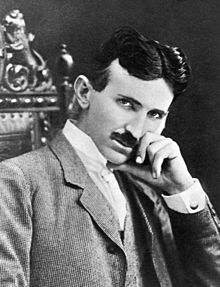

In [93]:
# lets check our we succeeded
# importing library for image display
from IPython.display import Image
Image('tesla.jpg')

In [108]:
tesla=soup.select('table')

In [144]:
tesl=tesla[0]

In [145]:
tesl.select('th')

[<th colspan="2" style="text-align:center;font-size:125%;font-weight:bold"><div class="fn" style="display:inline">Nikola Tesla</div></th>,
 <th scope="row">Born</th>,
 <th scope="row">Died</th>,
 <th scope="row">Resting place</th>,
 <th scope="row">Citizenship</th>,
 <th scope="row">Education</th>,
 <th scope="row">Discipline</th>,
 <th scope="row">Projects</th>,
 <th scope="row">Significant design</th>,
 <th scope="row">Awards</th>,
 <th colspan="2" style="text-align:center">Signature</th>]

In [146]:
tesla1=[]

for t in tesl.select('th'):
    tesla1.append(t.text)
print(tesla1)

['Nikola Tesla', 'Born', 'Died', 'Resting place', 'Citizenship', 'Education', 'Discipline', 'Projects', 'Significant design', 'Awards', 'Signature']


In [164]:
tesl.select('.plainlist')[0].getText()

'\nAlternating current\nhigh-voltage, high-frequency power experiments\n'

In [171]:
tesla2=[]

for t in tesl.select('.plainlist'):
    tesla2.append(t.text)
print(tesla2)

['\nAlternating current\nhigh-voltage, high-frequency power experiments\n', "\nAC motor\nCarbon button lamp\nDeath ray\nInduction motor\nPlasma globe\nPlasma lamp\nPolyphase system\nRadio control\nResonant inductive coupling\nRotating magnetic field\nTeleforce\nTelegeodynamics\nTeleoperation\nTesla coil\nTesla Experimental Station\nTesla's oscillator\nTesla turbine\nTesla valve\nTorpedo [1]\nVacuum variable capacitor\nViolet ray\nVTOL\nWardenclyffe Tower\nWireless power transfer\nWorld Wireless System\n", '\nOrder of St. Sava, II Class, Government of Serbia (1892)\nElliott Cresson Medal (1894)\nOrder of Prince Danilo I (1895)\nEdison Medal (1916)\nOrder of St. Sava, I Class, Government of Yugoslavia (1926)\nOrder of the Yugoslav Crown (1931)\nJohn Scott Medal (1934)\nOrder of the White Eagle, I Class, Government of Yugoslavia (1936)\nOrder of the White Lion, I Class, Government of Czechoslovakia (1937)\nUniversity of Paris Medal (1937)\nThe Medal of the University St Clement of Ochrida

In [101]:
soup.select('.infobox.biography.vcard')

In [138]:
tes=set()
for i in soup.select('.infobox.biography.vcard'):
    tes.add(i.text)
print(tes)

{"Nikola TeslaНикола ТеслаTesla, c.\u20091896Born(1856-07-10)10 July 1856Smiljan, Austrian Empire (modern-day Croatia)Died7 January 1943(1943-01-07) (aged\xa086)New York City, U.S.Resting placeNikola Tesla MuseumBelgrade, SerbiaCitizenshipAustrian (1856–1891)American (1891–1943)EducationGraz University of Technology (dropped out)Engineering careerDisciplineElectrical engineeringMechanical engineeringProjects\nAlternating current\nhigh-voltage, high-frequency power experiments\nSignificant design\n\xa0\n\nAC motor\nCarbon button lamp\nDeath ray\nInduction motor\nPlasma globe\nPlasma lamp\nPolyphase system\nRadio control\nResonant inductive coupling\nRotating magnetic field\nTeleforce\nTelegeodynamics\nTeleoperation\nTesla coil\nTesla Experimental Station\nTesla's oscillator\nTesla turbine\nTesla valve\nTorpedo [1]\nVacuum variable capacitor\nViolet ray\nVTOL\nWardenclyffe Tower\nWireless power transfer\nWorld Wireless System\n\n\nAwards\n\xa0\n\nOrder of St. Sava, II Class, Government o